<a href="https://colab.research.google.com/github/nalinis07/APT_Proj_Ref_copy/blob/MASTER/AT_Lesson_74_Project_Solution_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Logistic Regression - Univariate Classification I

 2. Logistic Regression - Univariate Classification II

 3. Logistic Regression - Decision Boundary.




---

### Problem Statement

Nowadays, social media advertising is one of the popular forms of advertising. Advertisers can utilise a user's demographic information and target their ads accordingly.

Build a Logistic Regression model to determine whether or not a user will purchase a particular product displayed on a social network ad by analysing the impact of the age of the user.



---

### List of Activities

**Activity 1:** Analyse the Dataset

  
**Activity 2:**  Normalise the Dataset

**Activity 3:**  Calculate the Sigmoid Output

**Activity 4:** Model prediction

**Activity 5:** Model Evaluation

**Activity 6**: Experiment and Compare Performance With Some Threshold Values

---

#### Activity 1:  Analyse the Dataset



- Create a Pandas DataFrame for a **Social Network** dataset using the below link. This dataset consists of the following columns:

|Field|Description|
|---:|:---|
|UserID|Unique ID|
|Gender|Male or Female|
|Age|Age of a person|
|EstimatedSalary|Salary of a person|
|Purchased|‘0’ or ‘1’. ‘0’ means not purchased and ‘1’ means purchased.|

  **Source:** https://www.kaggle.com/rishabhsingh98/social-network-ads

  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/social-network-ads.csv


- Print first five rows of the dataset.


In [ ]:
# Import the required modules and load the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/social-network-ads.csv'
df = pd.read_csv(csv_file)

In [ ]:
# Print first five rows of the dataframe.
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Check for null values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Q:** Are there any missing values?

**A:** No

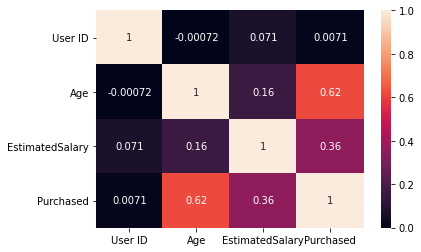

In [ ]:
# Create a heatmap to identify the relation between attributes
sns.heatmap(df.corr(),annot=True)
plt.show()

**Q:** Which attribute(s) has the strongest relationship with the `Purchased` feature? Why?

**A:** Age. As it can be observed from the heatmap that the age column has high correlation with the purchased column.  

---

#### Activity 2:  Normalise the Dataset

 Perform the following tasks:

 - Get the descriptive statistics for the `Age` column.

 - Normalise the `Age` column values by calculating their $Z$-scores (or standard scaler).



Age Descriptive Statistics:
count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64



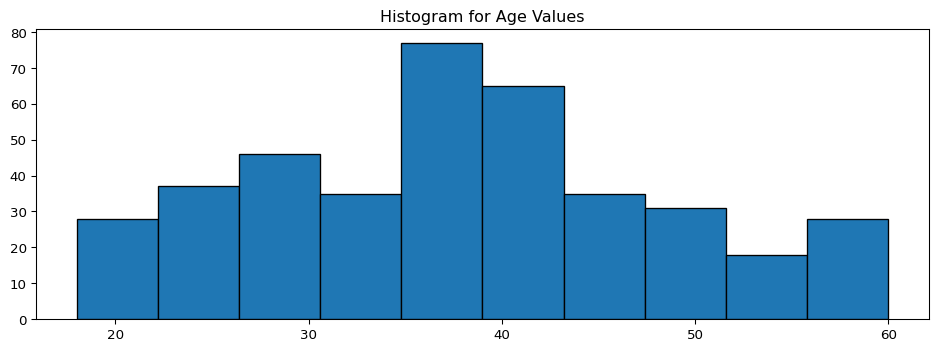

In [ ]:
# Get the descriptive statistics for the 'Age' column.
print(f"Age Descriptive Statistics:\n{df['Age'].describe()}\n")
# Plot a histogram to show the distribution of values for the 'Age' column.
plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Histogram for Age Values")
plt.hist(df['Age'], bins = 'sturges', edgecolor = 'black')
plt.show()

Descriptive statistics for the normalised age values:
count    4.000000e+02
mean    -2.486900e-16
std      1.000000e+00
min     -1.874962e+00
25%     -7.540869e-01
50%     -6.248285e-02
75%      7.960601e-01
max      2.131571e+00
Name: Age, dtype: float64



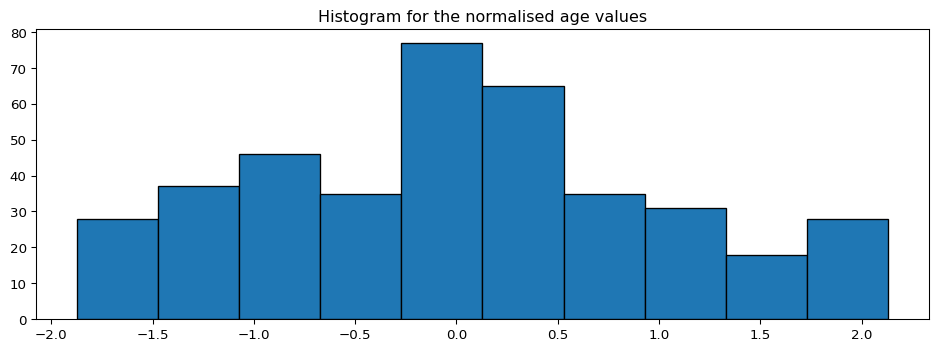

In [ ]:
# Normalise the 'Age' column values using the standard scaler method.
def standard_scaler(series):
  new_series = (series - series.mean()) / series.std()
  return new_series

# Get the descriptive statistics for the normalised 'Age' column.
age_scaled = standard_scaler(df['Age'])
print(f"Descriptive statistics for the normalised age values:\n{age_scaled.describe()}\n")

# Plot a histogram to show the distribution of values for the normalised 'age' column.
plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Histogram for the normalised age values")
plt.hist(age_scaled, bins = 'sturges', edgecolor = 'black')
plt.show()

---

#### Activity 3:  Calculate the Sigmoid Output

1. Create a sigmoid function.

2.  Calculate the sigmoid output for the scaled (or Normalised) `Age` values.

In [ ]:
# Create a sigmoid() function using the above formula.
def sigmoid(x):
  return pd.Series(1 / (1 + np.exp(-x)))

In [ ]:
# Calculate the sigmoid output for the scaled (or normalised) Age values.
age_scaled_sigmoid_output = sigmoid(age_scaled)

# Get the descriptive statistics for the sigmoid output of the normalised 'Age'.
print(f"Descriptive stats for sigmoid output of scaled Age values:\n{age_scaled_sigmoid_output.describe()}")

Descriptive stats for sigmoid output of scaled Age values:
count    400.000000
mean       0.497031
std        0.212792
min        0.132969
25%        0.319999
50%        0.484384
75%        0.689131
max        0.893934
Name: Age, dtype: float64


---

#### Activity 4:  Model Prediction

Consider the threshold probability value of 0.5.

- Create a function that classifies the sigmoid output for the scaled  `Age` values into 0s and 1s using a threshold value of 0.5.


In [ ]:
# Create a function 'predict()' that takes the sigmoid output and the threshold as its input and returns a Pandas series containing the predicted values (0s and 1s) as its output.

def predict(sigmoid_output, threshold):
  y_pred = [1 if output >= threshold else 0 for output in sigmoid_output]
  return pd.Series(y_pred)

In [ ]:
# Use the 'predict()' function to classify the 'sigmoid()' function outputs as 0 and 1.
# Consider a threshold value of 0.5.
threshold = 0.5
y_pred = predict(age_scaled_sigmoid_output, threshold)
y_pred

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Length: 400, dtype: int64

---

#### Activity 5:  Model Evaluation

Evaluate the model by calculating the number of false positives and false negatives using a confusion matrix. Also, print the classification report for the predicted values.

In [ ]:
# Create a confusion matrix for the predicted values.
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['Purchased'], y_pred))

[[181  76]
 [ 29 114]]


In [ ]:
# Print the classification report for the predicted values.
from sklearn.metrics import classification_report

print(classification_report(df['Purchased'], y_pred))

              precision    recall  f1-score   support

           0       0.86      0.70      0.78       257
           1       0.60      0.80      0.68       143

    accuracy                           0.74       400
   macro avg       0.73      0.75      0.73       400
weighted avg       0.77      0.74      0.74       400



**Q** Write the count of f1-score for both the labels?

**A:** 1. Label `0`  : 0.78
2. Label `1`  : 0.68

---

#### Activity 6: Experiment and Compare Performance With Some Threshold Values

Try threshold values =$[0.1,0.3,0.5,0.7,0.9]$ and compare their performance. Plot a graph to visualise.

[0.3575, 0.5675, 0.7375, 0.82, 0.6425]


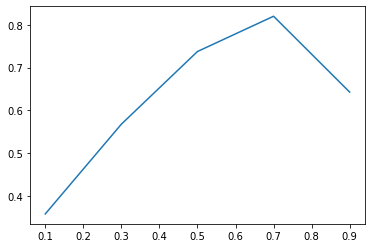

In [ ]:
# Function to calculate accuracy
def acc(y,y_pred):
  count=0
  for i in range(len(y)):
    if y[i]==y_pred[i]:
      count=count+1
  return count/len(y)


# Calculate accuracy and save it in the accuracy list
threshold=[0.1,0.3,0.5,0.7,0.9]
accuracy=[]


for i in [0.1,0.3,0.5,0.7,0.9]:
  y_pred=predict(age_scaled_sigmoid_output, i)
  accuracy.append(acc(df['Purchased'], y_pred))

# Print the accuracy values
print(accuracy)

# Plot a graph to visualise the accuracy for various thresholds
plt.plot(threshold,accuracy)

# Function to show the plot
plt.show()

**Q:** What are your observations for change in accuracy with respect to threshold values? Why do you think this is the case?

**A:** There is increase in the accuracy and then sudden dip is observed.

**Reason**: As we move along the extremes in the sigmoid function, it becomes more biased towards certain labels.

---